In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
%cd /content/drive/MyDrive/CZ4041 Machine Learning Project/Colab/data

/content/drive/.shortcut-targets-by-id/1ldppAeVJfaoI4cvwZyTCju9jXbD4LI-H/CZ4041 Machine Learning Project/Colab/data


In [160]:
import pandas as pd
train = pd.read_csv('train.csv',parse_dates=True, index_col=['date'])
test = pd.read_csv('test.csv',parse_dates=True, index_col=['date'])
train 

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
...,...,...,...
2017-12-27,10,50,63
2017-12-28,10,50,59
2017-12-29,10,50,74


In [ ]:
!pip install pandas-profiling==2.7.1
#!pip uninstall pandas-profiling

  Using cached https://files.pythonhosted.org/packages/50/8a/25da481171f4912e2515a76fe31b7a4f036a443b8858b244ef7daaffd5b6/pandas_profiling-2.7.1-py2.py3-none-any.whl


In [ ]:
import pandas_profiling 

In [ ]:
#pandas_profiling.ProfileReport(data) 
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(data)

In [ ]:
profile

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
data.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [11]:
data.shape

(913000, 4)

In [12]:
data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [8]:
data=data.drop(['date'], axis =1)
data

,store,item,sales,Year,Month,Day
0,1,1,13,2013,1,1
1,1,1,11,2013,1,2
2,1,1,14,2013,1,3
3,1,1,13,2013,1,4
4,1,1,10,2013,1,5
...,...,...,...,...,...,...
912995,10,50,63,2017,12,27
912996,10,50,59,2017,12,28
912997,10,50,74,2017,12,29
912998,10,50,62,2017,12,30


In [81]:
from pandas import DatetimeIndex
#database.info()
data['Year'] = DatetimeIndex(data['date']).year
data['Month'] = DatetimeIndex(data['date']).month
data['Day'] = DatetimeIndex(data['date']).day

test['Year'] = DatetimeIndex(test['date']).year
test['Month'] = DatetimeIndex(test['date']).month
test['Day'] = DatetimeIndex(test['date']).day


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [ ]:
y = pd.DataFrame(data["sales"])
X = pd.DataFrame(data[[ 'store','item','Day','Month','Year']])

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1 = sc.fit_transform(X)
#y1 = sc.fit_transform(y)
# Split the Dataset into Train and Test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)

In [ ]:
regressor = RandomForestRegressor(n_estimators=25, random_state=0)  
regressor.fit(X1, y)  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_train_pred = regressor.predict(X1)
#y_test_pred = regressor.predict(X_test)


In [127]:
import numpy as np
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [ ]:
smape(y,np.expand_dims(y_train_pred,1))

sales    6.757762
dtype: float64

In [130]:
test

,id,date,store,item,Year,Month,Day
0,0,2018-01-01,1,1,2018,1,1
1,1,2018-01-02,1,1,2018,1,2
2,2,2018-01-03,1,1,2018,1,3
3,3,2018-01-04,1,1,2018,1,4
4,4,2018-01-05,1,1,2018,1,5
...,...,...,...,...,...,...,...
44995,44995,2018-03-27,10,50,2018,3,27
44996,44996,2018-03-28,10,50,2018,3,28
44997,44997,2018-03-29,10,50,2018,3,29
44998,44998,2018-03-30,10,50,2018,3,30


In [ ]:

Xt = pd.DataFrame(test[[ 'store','item','Day','Month','Year']])

In [ ]:
y_train_predT = regressor.predict(Xt)

In [ ]:
y_train_predT

array([17.16, 15.4 , 12.6 , ..., 70.68, 68.32, 69.88])

In [ ]:
w = pd.DataFrame(y_train_predT)

In [ ]:
w=w.reset_index()
w.columns=['id','sales']

In [ ]:
w=w.reset_index(drop=True)
w

,id,sales
0,0,17.16
1,1,15.40
2,2,12.60
3,3,15.52
4,4,16.04
...,...,...
44995,44995,66.72
44996,44996,58.80
44997,44997,70.68
44998,44998,68.32


In [ ]:
w.to_csv('submission.csv',index=False)

In [ ]:
!pwd

/content/drive/.shortcut-targets-by-id/1ldppAeVJfaoI4cvwZyTCju9jXbD4LI-H/CZ4041 Machine Learning Project/Colab/data


In [ ]:
w

,id,sales
0,0,17.16
1,1,15.40
2,2,12.60
3,3,15.52
4,4,16.04
...,...,...
44995,44995,66.72
44996,44996,58.80
44997,44997,70.68
44998,44998,68.32


In [82]:
import numpy as np

print("number of different items: %i" %(len(np.unique(dataset.item))))
print("number of different stores: %i" %(len(np.unique(dataset.store))))
print("number of different dates: %i" %(len(np.unique(dataset.date))))
print("maximun date in data: %s" %(max(dataset.date)))
print("minimum date in data: %s" %(min(dataset.date)))

number of different items: 50
number of different stores: 10
number of different dates: 1826
maximun date in data: 2017-12-31
minimum date in data: 2013-01-01


In [83]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt 
%matplotlib inline   
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

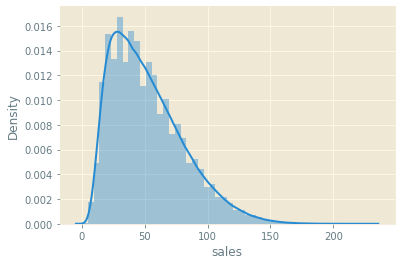

In [84]:
sns.distplot(dataset["sales"])

In [85]:

dataset['weekday']=pd.DatetimeIndex(dataset['date']).weekday
dataset['month']=pd.DatetimeIndex(dataset['date']).month 
dataset['year']=pd.DatetimeIndex(dataset['date']).year

<Figure size 1080x720 with 0 Axes>

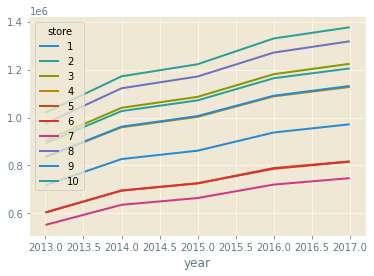

In [86]:

#we check anual sales profile comparing stores
c=dataset.groupby(['year','store']).sum()
plt.figure(figsize=(15,10))
d=c.unstack()
d.plot(y='sales')

<Figure size 1080x720 with 0 Axes>

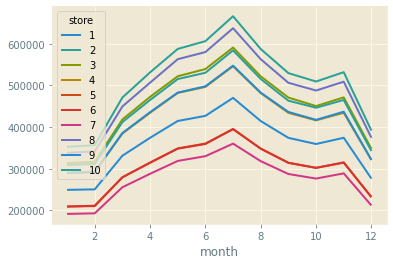

In [87]:
c=dataset.groupby(['month', 'store']).sum()
plt.figure(figsize=(15,10))
d=c.unstack()
d.plot(y='sales')

<Figure size 1080x720 with 0 Axes>

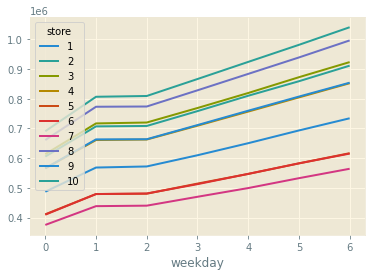

In [88]:

#we check anual sales profile comparing stores
c=dataset.groupby(['weekday','store']).sum()
plt.figure(figsize=(15,10))
d=c.unstack()
d.plot(y='sales')

In [89]:

dataset.drop(columns=["year","month","weekday"],inplace=True)
dataset.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [92]:
store1item1 = dataset.loc[(dataset['store'] == 1)]


In [93]:
store1item1.shape

(91300, 4)

In [94]:
store1item1['date']  =  pd.to_datetime(store1item1['date'],infer_datetime_format = True)             #convert from string to datetime

indexedDataset  =  store1item1.set_index(['date'])
indexedDataset= indexedDataset.drop(columns=["store","item"])
indexedDataset.head(5)

,sales
date,
2013-01-01,13
2013-01-02,11
2013-01-03,14
2013-01-04,13
2013-01-05,10


In [95]:
indexedDataset.shape

(91300, 1)

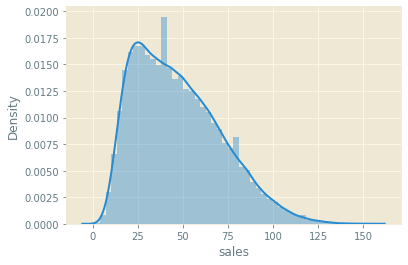

In [96]:
sns.distplot(indexedDataset["sales"])

In [97]:

# Determine rolling statistics
def rolling_means(time_series):
    rolmean  =  time_series.rolling(window = 12).mean()    #window size 12 denotes 12 months, giving rolling mean at yearly level
    rolstd  =  time_series.rolling(window = 12).std()

    orig  =  plt.plot(time_series, color = 'blue', label = 'Original')
    mean  =  plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std  =  plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)

In [98]:
#Perform Augmented Dickey–Fuller test:
def adf_test(time_series):
    
    from statsmodels.tsa.stattools import adfuller
    dftest  =  adfuller(time_series, autolag = 'AIC')

    dfoutput  =  pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        
        dfoutput['Critical Value (%s)'%key]  =  value
    
    print('Results of Dickey Fuller Test:') 
    print(dfoutput)

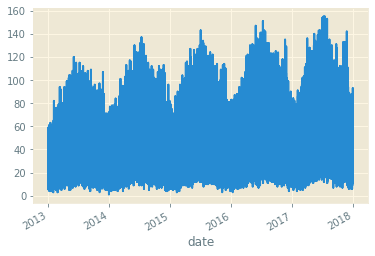

In [99]:
indexedDataset['sales'].plot()

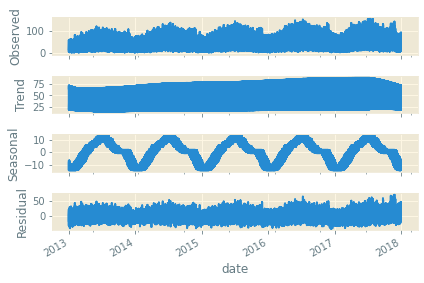

In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose
fig = seasonal_decompose(indexedDataset['sales'], model='additive', freq=365).plot()

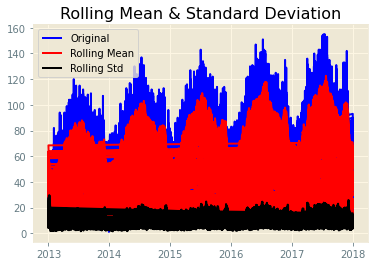

In [101]:
rolling_means(indexedDataset["sales"])

In [102]:
adf_test(indexedDataset['sales'])

Results of Dickey Fuller Test:
Test Statistic                -1.262780e+01
p-value                        1.528032e-23
#Lags Used                     6.600000e+01
Number of Observations Used    9.123300e+04
Critical Value (1%)           -3.430422e+00
Critical Value (5%)           -2.861572e+00
Critical Value (10%)          -2.566787e+00
dtype: float64


In [103]:
indexedDataset_logScale  =  np.log(indexedDataset)

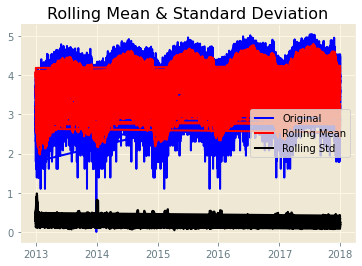

In [104]:
rolling_means(indexedDataset_logScale)

In [105]:

movingAverage  =  indexedDataset_logScale.rolling(window = 12).mean()
datasetLogScaleMinusMovingAverage  =  indexedDataset_logScale - movingAverage

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace = True)

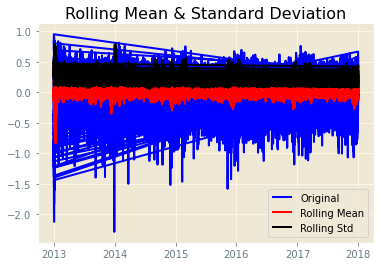

In [106]:
rolling_means(datasetLogScaleMinusMovingAverage)

In [107]:
adf_test(datasetLogScaleMinusMovingAverage.sales)

Results of Dickey Fuller Test:
Test Statistic                   -35.637245
p-value                            0.000000
#Lags Used                        66.000000
Number of Observations Used    91222.000000
Critical Value (1%)               -3.430422
Critical Value (5%)               -2.861572
Critical Value (10%)              -2.566787
dtype: float64


In [108]:
adf_test(indexedDataset_logScale.sales)

Results of Dickey Fuller Test:
Test Statistic                -1.169448e+01
p-value                        1.623131e-21
#Lags Used                     6.600000e+01
Number of Observations Used    9.123300e+04
Critical Value (1%)           -3.430422e+00
Critical Value (5%)           -2.861572e+00
Critical Value (10%)          -2.566787e+00
dtype: float64


In [109]:
exponentialDecayWeightedAverage  =  indexedDataset_logScale.ewm(halflife = 12, min_periods = 0, adjust = True).mean()

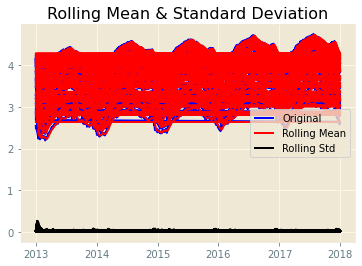

In [110]:
rolling_means(exponentialDecayWeightedAverage)

In [111]:
adf_test(exponentialDecayWeightedAverage.sales)

Results of Dickey Fuller Test:
Test Statistic                -1.077903e+01
p-value                        2.280247e-19
#Lags Used                     6.600000e+01
Number of Observations Used    9.123300e+04
Critical Value (1%)           -3.430422e+00
Critical Value (5%)           -2.861572e+00
Critical Value (10%)          -2.566787e+00
dtype: float64


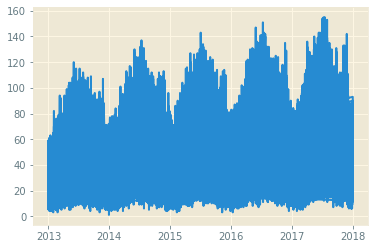

In [113]:
plt.plot(indexedDataset)

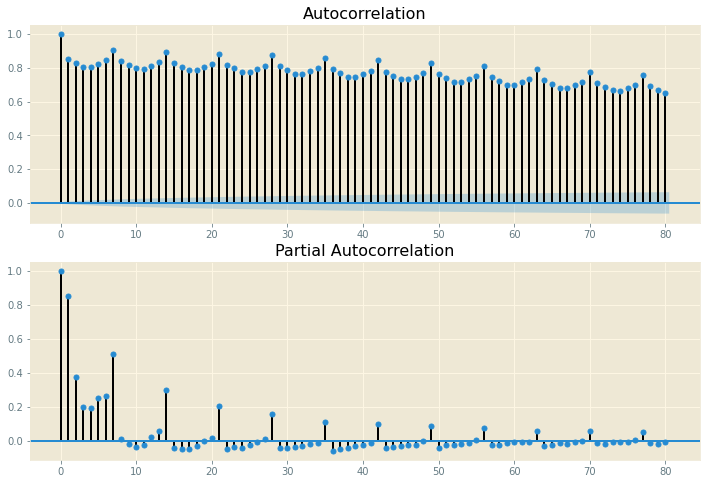

In [114]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(indexedDataset, lags=80, ax=ax1) 
ax2 = fig.add_subplot(212)
fig = plot_pacf(indexedDataset.sales, lags=80, ax=ax2)

In [115]:
train = indexedDataset

In [116]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA (train, order=(7,0,7))
model_fit = model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  sales   No. Observations:                91300
Model:                     ARMA(7, 7)   Log Likelihood             -318258.636
Method:                       css-mle   S.D. of innovations              7.900
Date:                Fri, 02 Apr 2021   AIC                         636549.273
Time:                        05:48:10   BIC                         636700.023
Sample:                             0   HQIC                        636595.210
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          47.2689      2.389     19.787      0.000      42.587      51.951
ar.L1.sales    -0.0015      0.000     -3.604      0.000      -0.002      -0.001
ar.L2.sales    -0.0017      0.000     -3.907    

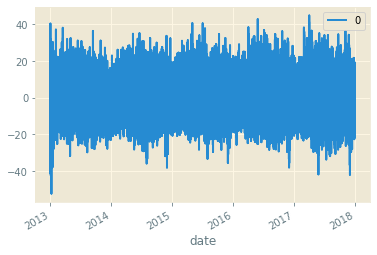

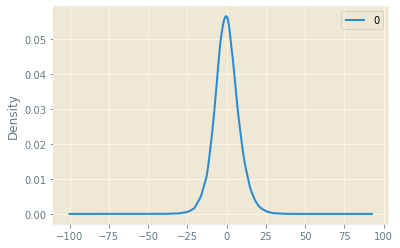

                  0
count  91300.000000
mean       0.001771
std        7.900726
min      -52.181675
25%       -4.903337
50%       -0.179868
75%        4.751953
max       44.715733


In [117]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [118]:
model_fit.fittedvalues.head()

date
2013-01-01    47.268933
2013-01-02    18.083417
2013-01-03    15.114019
2013-01-04    15.467271
2013-01-05    15.047111
dtype: float64

In [119]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
error = mean_squared_error(train, model_fit.fittedvalues)
print('Train MSE: %.3f' % error)

Train MSE: 62.421


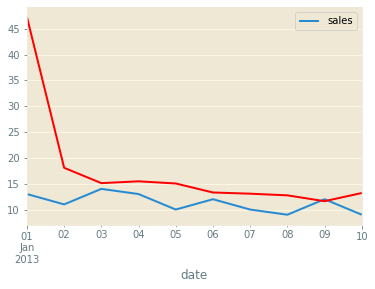

In [120]:
train.head(10).plot()
model_fit.fittedvalues.head(10).plot(color='red')

In [128]:
y = pd.DataFrame(indexedDataset["sales"])
smape(y,np.expand_dims(model_fit.fittedvalues,1))

sales    14.810892
dtype: float64

In [155]:
start_index = len(test2)
end_index = start_index + 4499
predictions = model_fit.predict(start_index, end_index)

In [177]:
import numpy as np 
import pandas as pd 
import lightgbm as lgb
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


# defining some functions
def smape(x, x_):
    """Return the smape value for two arrays."""
    return 100 * np.mean(2 * np.abs(x - x_)/(np.abs(x) + np.abs(x_)))
    
def linear_fit_slope(y):
    """Return the slope of a linear fit to a series."""
    y_pure = y.dropna()
    length = len(y_pure)
    x = np.arange(0, length)
    slope, intercept = np.polyfit(x, y_pure.values, deg=1)
    return slope

def linear_fit_intercept(y):
    """Return the intercept of a linear fit to a series."""
    y_pure = y.dropna()
    length = len(y_pure)
    x = np.arange(0, length)
    slope, intercept = np.polyfit(x, y_pure.values, deg=1)
    return intercept

In [178]:
test['sales'] = np.nan
df = pd.concat([train, test.loc[:, ['store', 'item', 'sales']]]).sort_values(by=['store', 'item'])

In [179]:
# adding some time-related factors
df['quarter'] = df.index.quarter
df['month'] = df.index.month
df['dow'] = df.index.weekday
df['week_block_num'] = [int(x) for x in np.floor((df.index - pd.to_datetime('2012-12-31')).days/7) + 1]
df['quarter_block_num'] = (df.index.year - 2013) * 4 + df['quarter']

In [180]:
df

,store,item,sales,quarter,month,dow,week_block_num,quarter_block_num
date,,,,,,,,
2013-01-01,1,1,13.0,1,1,1,1,1
2013-01-02,1,1,11.0,1,1,2,1,1
2013-01-03,1,1,14.0,1,1,3,1,1
2013-01-04,1,1,13.0,1,1,4,1,1
2013-01-05,1,1,10.0,1,1,5,1,1
...,...,...,...,...,...,...,...,...
2018-03-27,10,50,NaN,1,3,1,274,21
2018-03-28,10,50,NaN,1,3,2,274,21
2018-03-29,10,50,NaN,1,3,3,274,21


In [181]:
# finding the slope of a linear fit for sale values grouped by store, item and day of week
lin_slope_df = df.groupby(['store', 'item', 'dow'])['sales'].apply(linear_fit_slope).reset_index()
lin_slope_df.columns = ['store', 'item', 'dow', 'lin_slope']
df = df.reset_index().merge(lin_slope_df, how='left', on=['store', 'item', 'dow']).set_index('date')

# finding the intercept of a linear fit for sale values grouped by store, item and day of week
lin_intercept_df = df.groupby(['store', 'item', 'dow'])['sales'].apply(linear_fit_intercept).reset_index()
lin_intercept_df.columns = ['store', 'item', 'dow', 'lin_intercept']
df = df.reset_index().merge(lin_intercept_df, how='left', on=['store', 'item', 'dow']).set_index('date')

# fitting a linear model to the sale values grouped by store, item and day of week (trend)
df['linear_fit'] = (df['week_block_num'] - 1) * df['lin_slope'] + df['lin_intercept']

# removing the increasing trend from the sale values
df['trend_removed_sales'] = df['sales'] - df['linear_fit']

In [182]:
df

,store,item,sales,quarter,month,dow,week_block_num,quarter_block_num,lin_slope,lin_intercept,linear_fit,trend_removed_sales
date,,,,,,,,,,,,
2013-01-01,1,1,13.0,1,1,1,1,1,0.028226,14.499196,14.499196,-1.499196
2013-01-02,1,1,11.0,1,1,2,1,1,0.026294,15.374835,15.374835,-4.374835
2013-01-03,1,1,14.0,1,1,3,1,1,0.030057,15.544675,15.544675,-1.544675
2013-01-04,1,1,13.0,1,1,4,1,1,0.027118,17.490012,17.490012,-4.490012
2013-01-05,1,1,10.0,1,1,5,1,1,0.035435,18.366617,18.366617,-8.366617
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-27,10,50,NaN,1,3,1,274,21,0.092790,55.715042,81.046787,NaN
2018-03-28,10,50,NaN,1,3,2,274,21,0.094920,56.484104,82.397371,NaN
2018-03-29,10,50,NaN,1,3,3,274,21,0.116443,58.394987,90.183905,NaN


In [183]:
# removing the yearly seasonality from the sale values
differenced_df = df.groupby(['store', 'item', 'dow'])['trend_removed_sales'].rolling(window=53, min_periods=53).\
apply(lambda x: x[-1]-x[0]).reset_index()
differenced_df.columns = ['store', 'item', 'dow', 'date', 'diff']
differenced_df = differenced_df.sort_values(by=['store', 'item', 'date'])
df['diff'] = differenced_df['diff'].values


In [184]:
diff_mean_df = df.groupby(['store', 'item', 'dow'])['diff'].mean().reset_index()
diff_mean_df.columns = ['store', 'item', 'dow', 'diff_mean']
df = df.reset_index().merge(diff_mean_df, how='left', on=['store', 'item', 'dow']).set_index('date')

diff_std_df = df.groupby(['store', 'item', 'dow'])['diff'].std().reset_index()
diff_std_df.columns = ['store', 'item', 'dow', 'diff_std']
df = df.reset_index().merge(diff_std_df, how='left', on=['store', 'item', 'dow']).set_index('date')

df['norm_diff'] = (df['diff'] - df['diff_mean']) / df['diff_std']


In [185]:
df['outlier'] = (abs(df['norm_diff']) > 3) * 1


In [186]:
corrected_sales = []
for ind, row in df[df['outlier']==1].iterrows():
    past_week = ind - pd.Timedelta('7 days')
    next_week = ind + pd.Timedelta('7 days')
    store = row['store']
    item = row['item']
    past_week_sales = df.loc[past_week][(df.loc[past_week]['store']==store) & 
    (df.loc[past_week]['item']==item)]['sales'].values[0]
    next_week_sales = df.loc[next_week][(df.loc[next_week]['store']==store) & 
    (df.loc[next_week]['item']==item)]['sales'].values[0]
    interpolated_sales = 0.5 * (past_week_sales + next_week_sales)
    corrected_sales.append(interpolated_sales)
df.loc[df['outlier']==1, 'sales'] = corrected_sales

In [187]:
df.drop(columns = ['linear_fit',
                   'lin_slope', 
                   'lin_intercept', 
                   'trend_removed_sales', 
                   'diff', 
                   'diff_mean', 
                   'diff_std', 
                   'norm_diff', 
                   'outlier'], 
                   inplace=True)
                 
# sorting dataframe
df = df.sort_values(by=['item', 'store'])

In [188]:
for item in ['dow', 'month', 'quarter']:
    grouped_df = df.groupby(['store', 'item', item])['sales'].expanding().mean().shift(1).bfill().reset_index()
    grouped_df.columns = ['store', 'item', item,'date', item + '_ex_avg_sale']
    grouped_df = grouped_df.sort_values(by=['item', 'store', 'date'])
    df[item + '_ex_avg_sale'] = grouped_df[item + '_ex_avg_sale'].values
    

In [189]:
store_item_mean_sale_series = df.groupby(['store', 'item'])['sales'].mean()
sale_critical_value = store_item_mean_sale_series.quantile(0.5)
critical_store_item_df = store_item_mean_sale_series[store_item_mean_sale_series < sale_critical_value].reset_index()
critical_store_item_df.drop(columns=['sales'], inplace=True)
critical_store_item_df['critical_store_item'] = 1
df = df.reset_index().merge(critical_store_item_df, how='left', on=['store', 'item']).set_index('date')
df['critical_store_item'] = df['critical_store_item'].fillna(0)


In [190]:
df = df.sort_values(by=['item', 'store'])

# defining useful features for lightGBM
used_feats = ['month_ex_avg_sale', 'dow_ex_avg_sale', 'quarter_ex_avg_sale',
              'month', 'dow', 'quarter_block_num', 'critical_store_item', 'sales']
df = df.loc[:, used_feats]

In [192]:
training_df = df.loc['2013':'2017']
testing_df = df.loc['2018']


In [193]:
# defining a condition for critical store, items and droping the 'critical_store_item' value
critical_store_item_mask = testing_df['critical_store_item']==1
training_df.drop(columns=['critical_store_item'], inplace=True)
testing_df.drop(columns=['critical_store_item'], inplace=True)

Training until validation scores don't improve for 50 rounds.
[2000]	valid_0's mape: 0.132326
[4000]	valid_0's mape: 0.132052
Early stopping, best iteration is:
[4110]	valid_0's mape: 0.132035
validation smape:  12.596475638871734
validation mae:  5.602650597970136


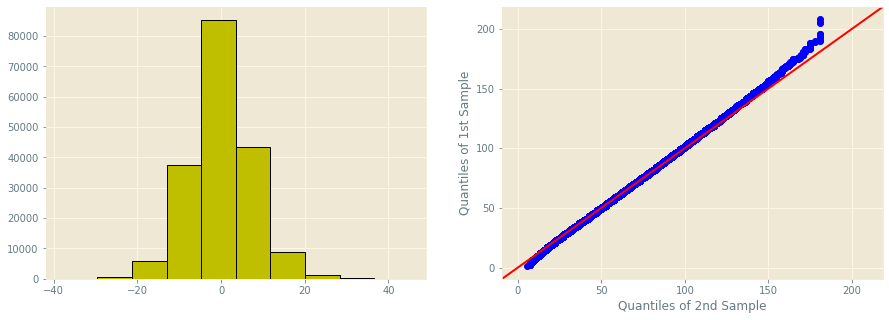

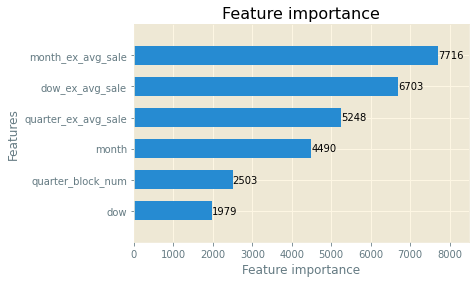

In [194]:
# developing a lightGBM model, evaluating it and investigating feature importance
X = training_df.loc[:, [col for col in training_df.columns if col not in ['sales']]]
y = training_df['sales']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)

# defining the parameters and hyper-parameters. For better result, the hyper-parameters should be 
# tuned carefully.
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'max_depth': 3,
    'metric' : 'mape',
    'learning_rate': 0.1
}
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10000,
                valid_sets=lgb_val,
                early_stopping_rounds=50,
                verbose_eval=2000)

preds = gbm.predict(X_val, num_iteration=gbm.best_iteration)

print('validation smape: ', smape(y_val, preds))
print('validation mae: ', mean_absolute_error(y_val, preds))

# investigating the distribution of the error
error = y_val.values - preds

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.hist(error, EDGECOLOR='black', color='y')

# comparing the distribution of the predictin and the actual 
sm.qqplot_2samples(y_val.values, preds, line='45', ax=plt.subplot(1, 2, 2))
plt.show()

# exploring the feature importance
lgb.plot_importance(gbm, height=0.6)
plt.show()

In [195]:
# predicting sale values for year 2018
X_train = training_df.loc[:, [col for col in training_df.columns if col not in ['sales']]].values 
y_train = training_df['sales'].values
X_test = testing_df.loc[:, [col for col in testing_df.columns if col not in ['sales']]]
lgb_train = lgb.Dataset(X_train, y_train)

# defining the parameters and hyper-parameters. For better result, the hyper-parameters should be 
# tuned carefully.
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'max_depth': 3,
    'learning_rate': 0.1
}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10000)
test_preds = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# adding prediction to testing dataframe
testing_df.loc[:,'sales'] = test_preds

# for critical store items, the prediction is multplied by a factor slightly smaller than 1 as it 
# apears the model overpredicts them
testing_df.loc[critical_store_item_mask, 'sales'] = testing_df.loc[critical_store_item_mask, 'sales'] * 0.99


In [198]:
sample_submission = testing_df['sales'].values
sample_submission.to_csv('submision_1.csv',index=False)
print(sample_submission.head())

AttributeError: ignored

In [207]:
cd ..

/content/drive/.shortcut-targets-by-id/1ldppAeVJfaoI4cvwZyTCju9jXbD4LI-H/CZ4041 Machine Learning Project/Colab


In [210]:
createSubmission(sample_submission)

In [209]:
def createSubmission(predictions,fileName="data/submission123.csv"):
  df=pd.DataFrame(predictions)
  df=df.reset_index()
  df.columns=['id','sales']
  df.to_csv(fileName,index=False)